Co-authors Network Analysis
---------------------------

Academic articles can have from 1 to more than 20 articles. Some fields tend today
have more collaborations than others, in this section the connectivity of the
authors within the prisoner's dilemma field is examined. Over the \uniquetitles
articles within the data set the total number of unique authors is \authors.

Note that the authors name had to be cleaned before this analysis could be held.
Several journals use different methods of writing an authors name. For this reason
the Levenshtein Distance was used to calculated the difference between name 
entries. A manual check was performed before replacing the flagged entries
by the Levenshtein Distance.

The authors will be represented in a network. The network has sets of vertices \(V\) and edges \(E\). The 
\authors vertices represent each of the unique authors. The vertices are connected
with an edge if and only if two authors have written together. Weights have been
applied to both the vertices and the edges. Vertices' weight corresponds to 
the number of papers the author has within the data set and the edge weight
to the number of times the author wrote together.

In this notebook:
- 3.Co-authors Network Analysis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools
import collections
import random 

%matplotlib inline

In [2]:
import matplotlib.patches as mpatches

Prepering the data
------------------

In [3]:
df = pd.read_json('../data/data_nov_2017_clean.json')

In [4]:
# names to lower case
df.author = df.author.str.lower()

In [5]:
authors = len(df.author.unique())
authors

2104

In [6]:
file = open("/home/nightwing/rsc/Literature-Article/assets/authors.txt", 'w')
file.write('{}'.format(authors))
file.close()

Co-authors
----------

In [7]:
pairs = []
for _, d in df.groupby('unique_key'):
    pairs += tuple(sorted(list(itertools.combinations(d['author'].unique(), 2))))
    co_authors = collections.Counter(pairs)

For creating and analysing the [network](https://networkx.github.io/) the python library networkx will be used though out 
the notebook.

In [8]:
authors_num_papers = df.groupby(['author', 'unique_key']).size().reset_index().groupby('author').count()
authors_num_papers = authors_num_papers.drop(0, axis=1)

In [9]:
G = nx.Graph()
_ = [G.add_node(name, weight=w) for name, w in zip(df.author, authors_num_papers['unique_key'].values)]
_ = [G.add_edge(*pair[0], weight=pair[1]) for pair in co_authors.items()]

In [10]:
number_of_author = len(df.author.unique())
number_of_author 

2104

Illustrating co-authors network
------------------------

In [17]:
sizes = [s * 100 for s in authors_num_papers['unique_key'].values]

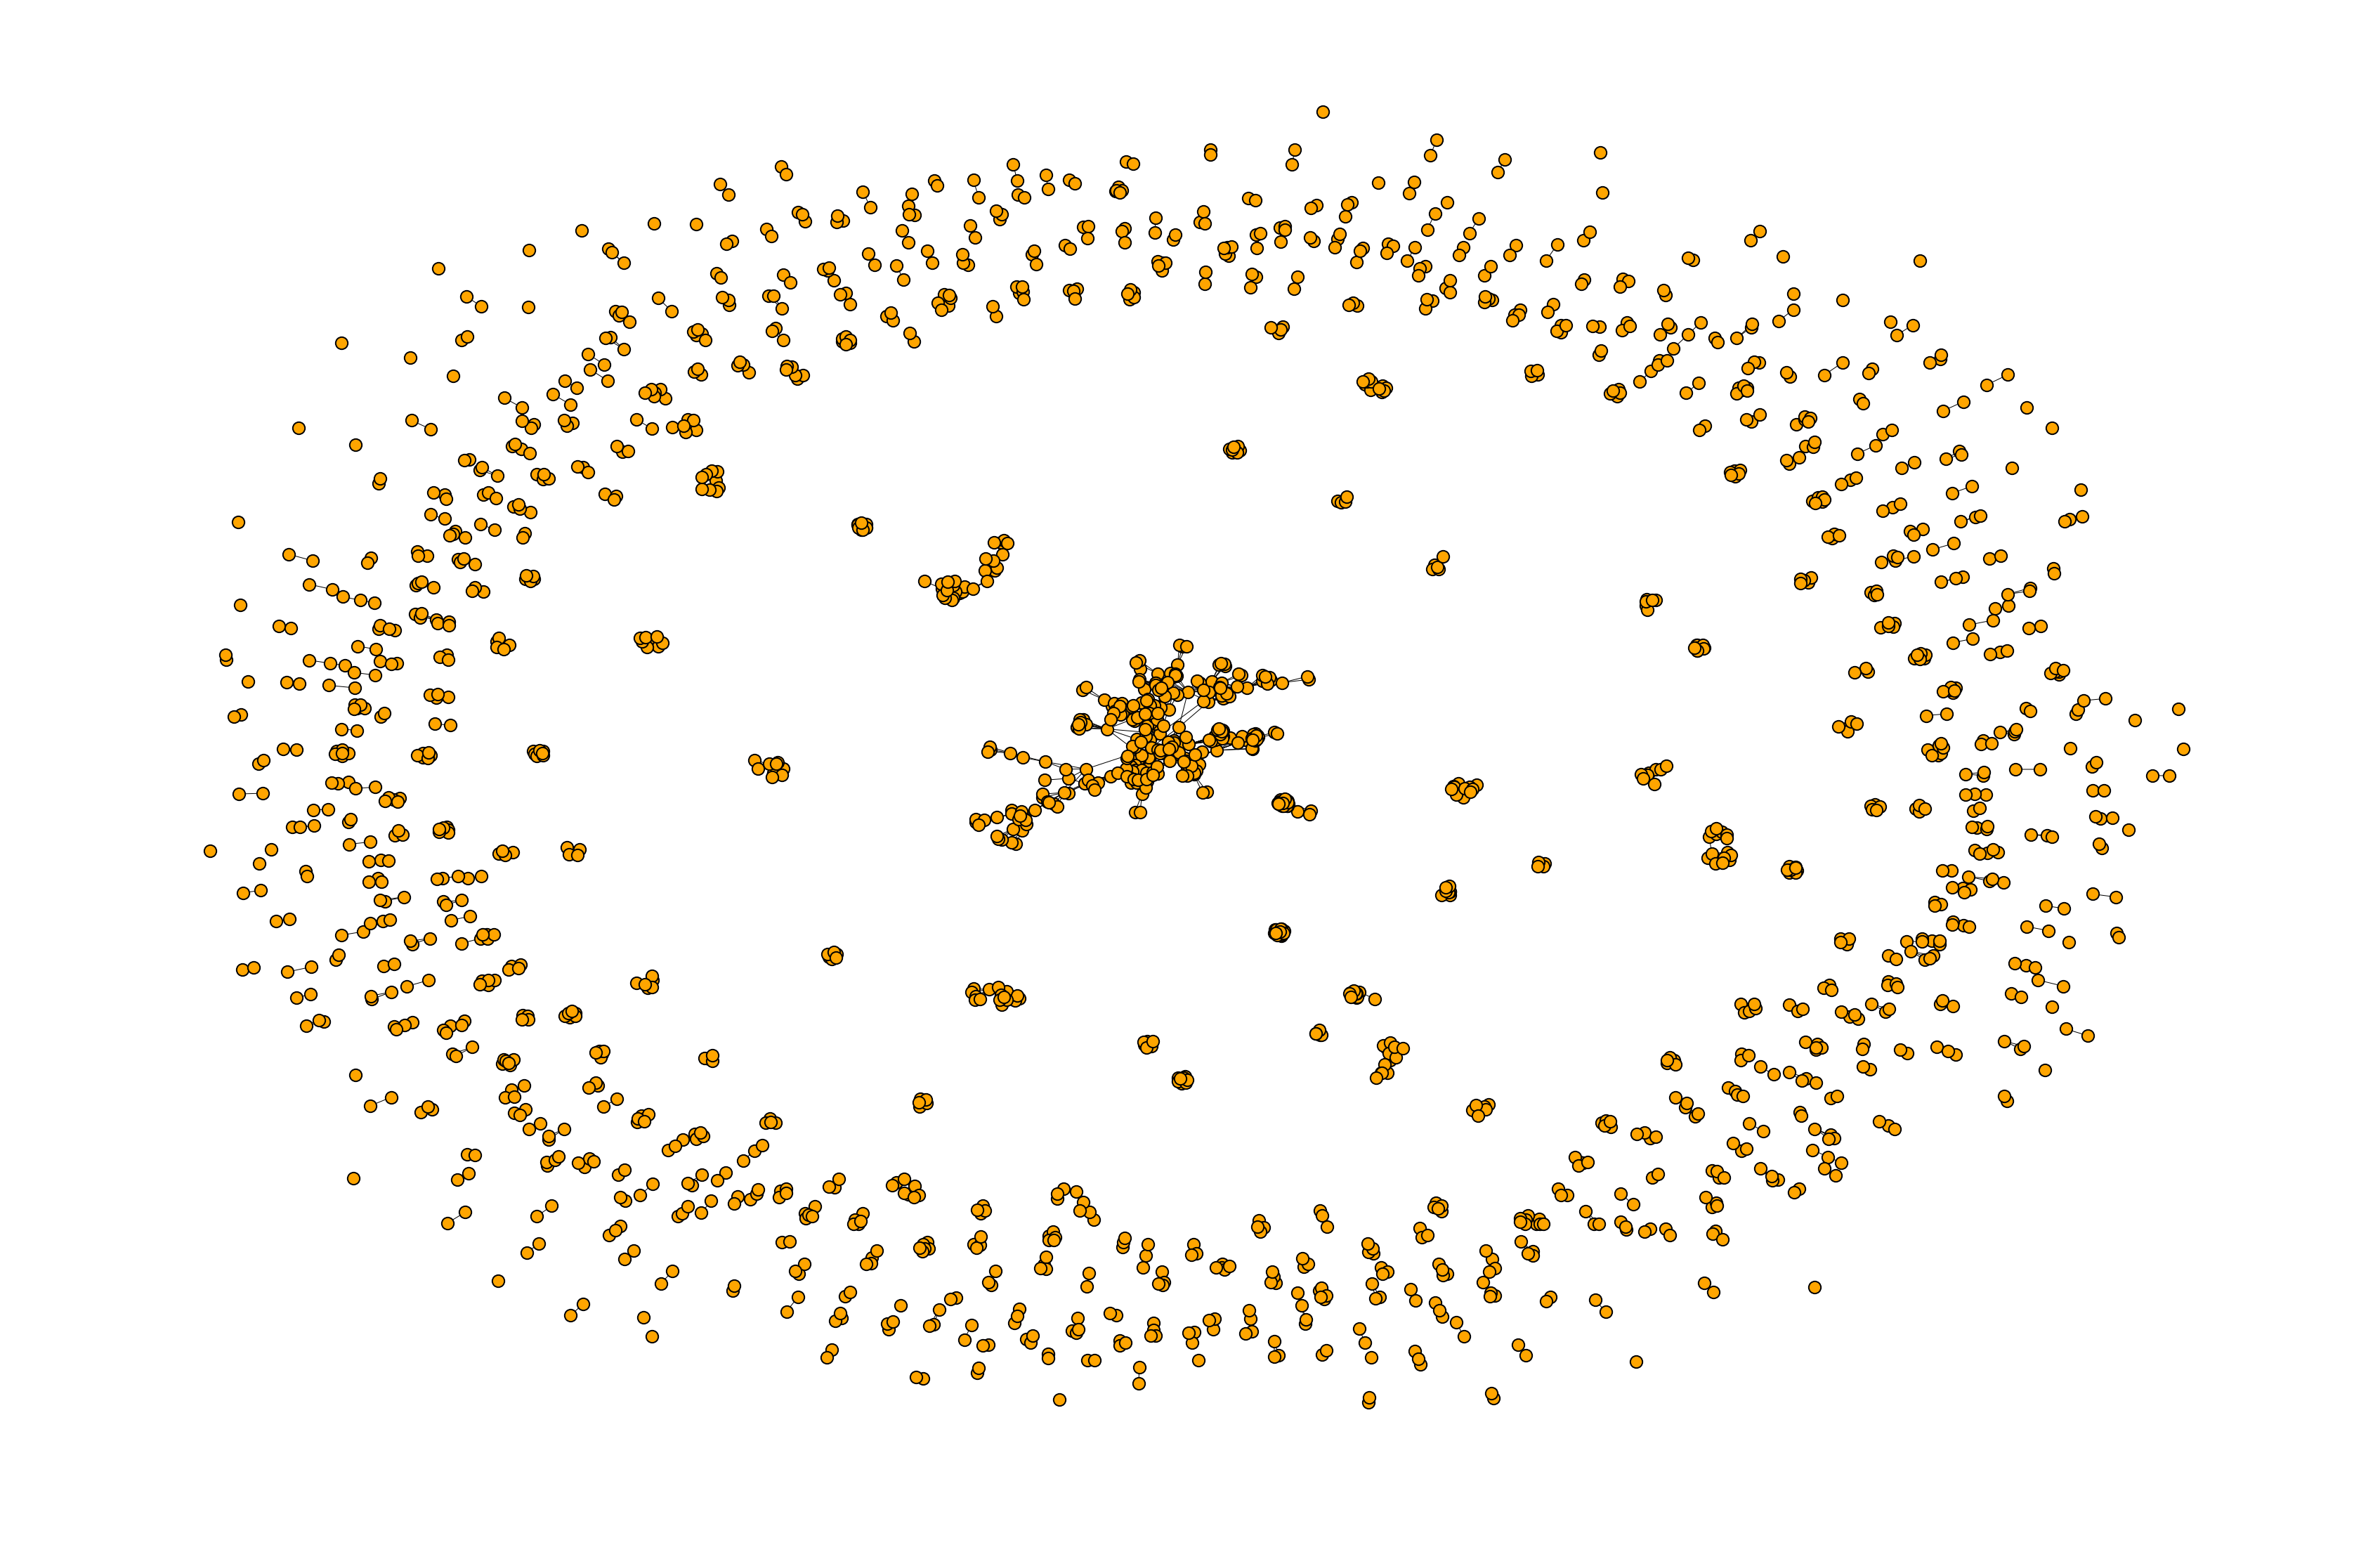

In [20]:
fig = plt.figure(figsize=(60, 40))

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(G, pos)

limits=plt.axis('off') 
#plt.show()
plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/co-authors-network", format='pdf', bbox_inches='tight')

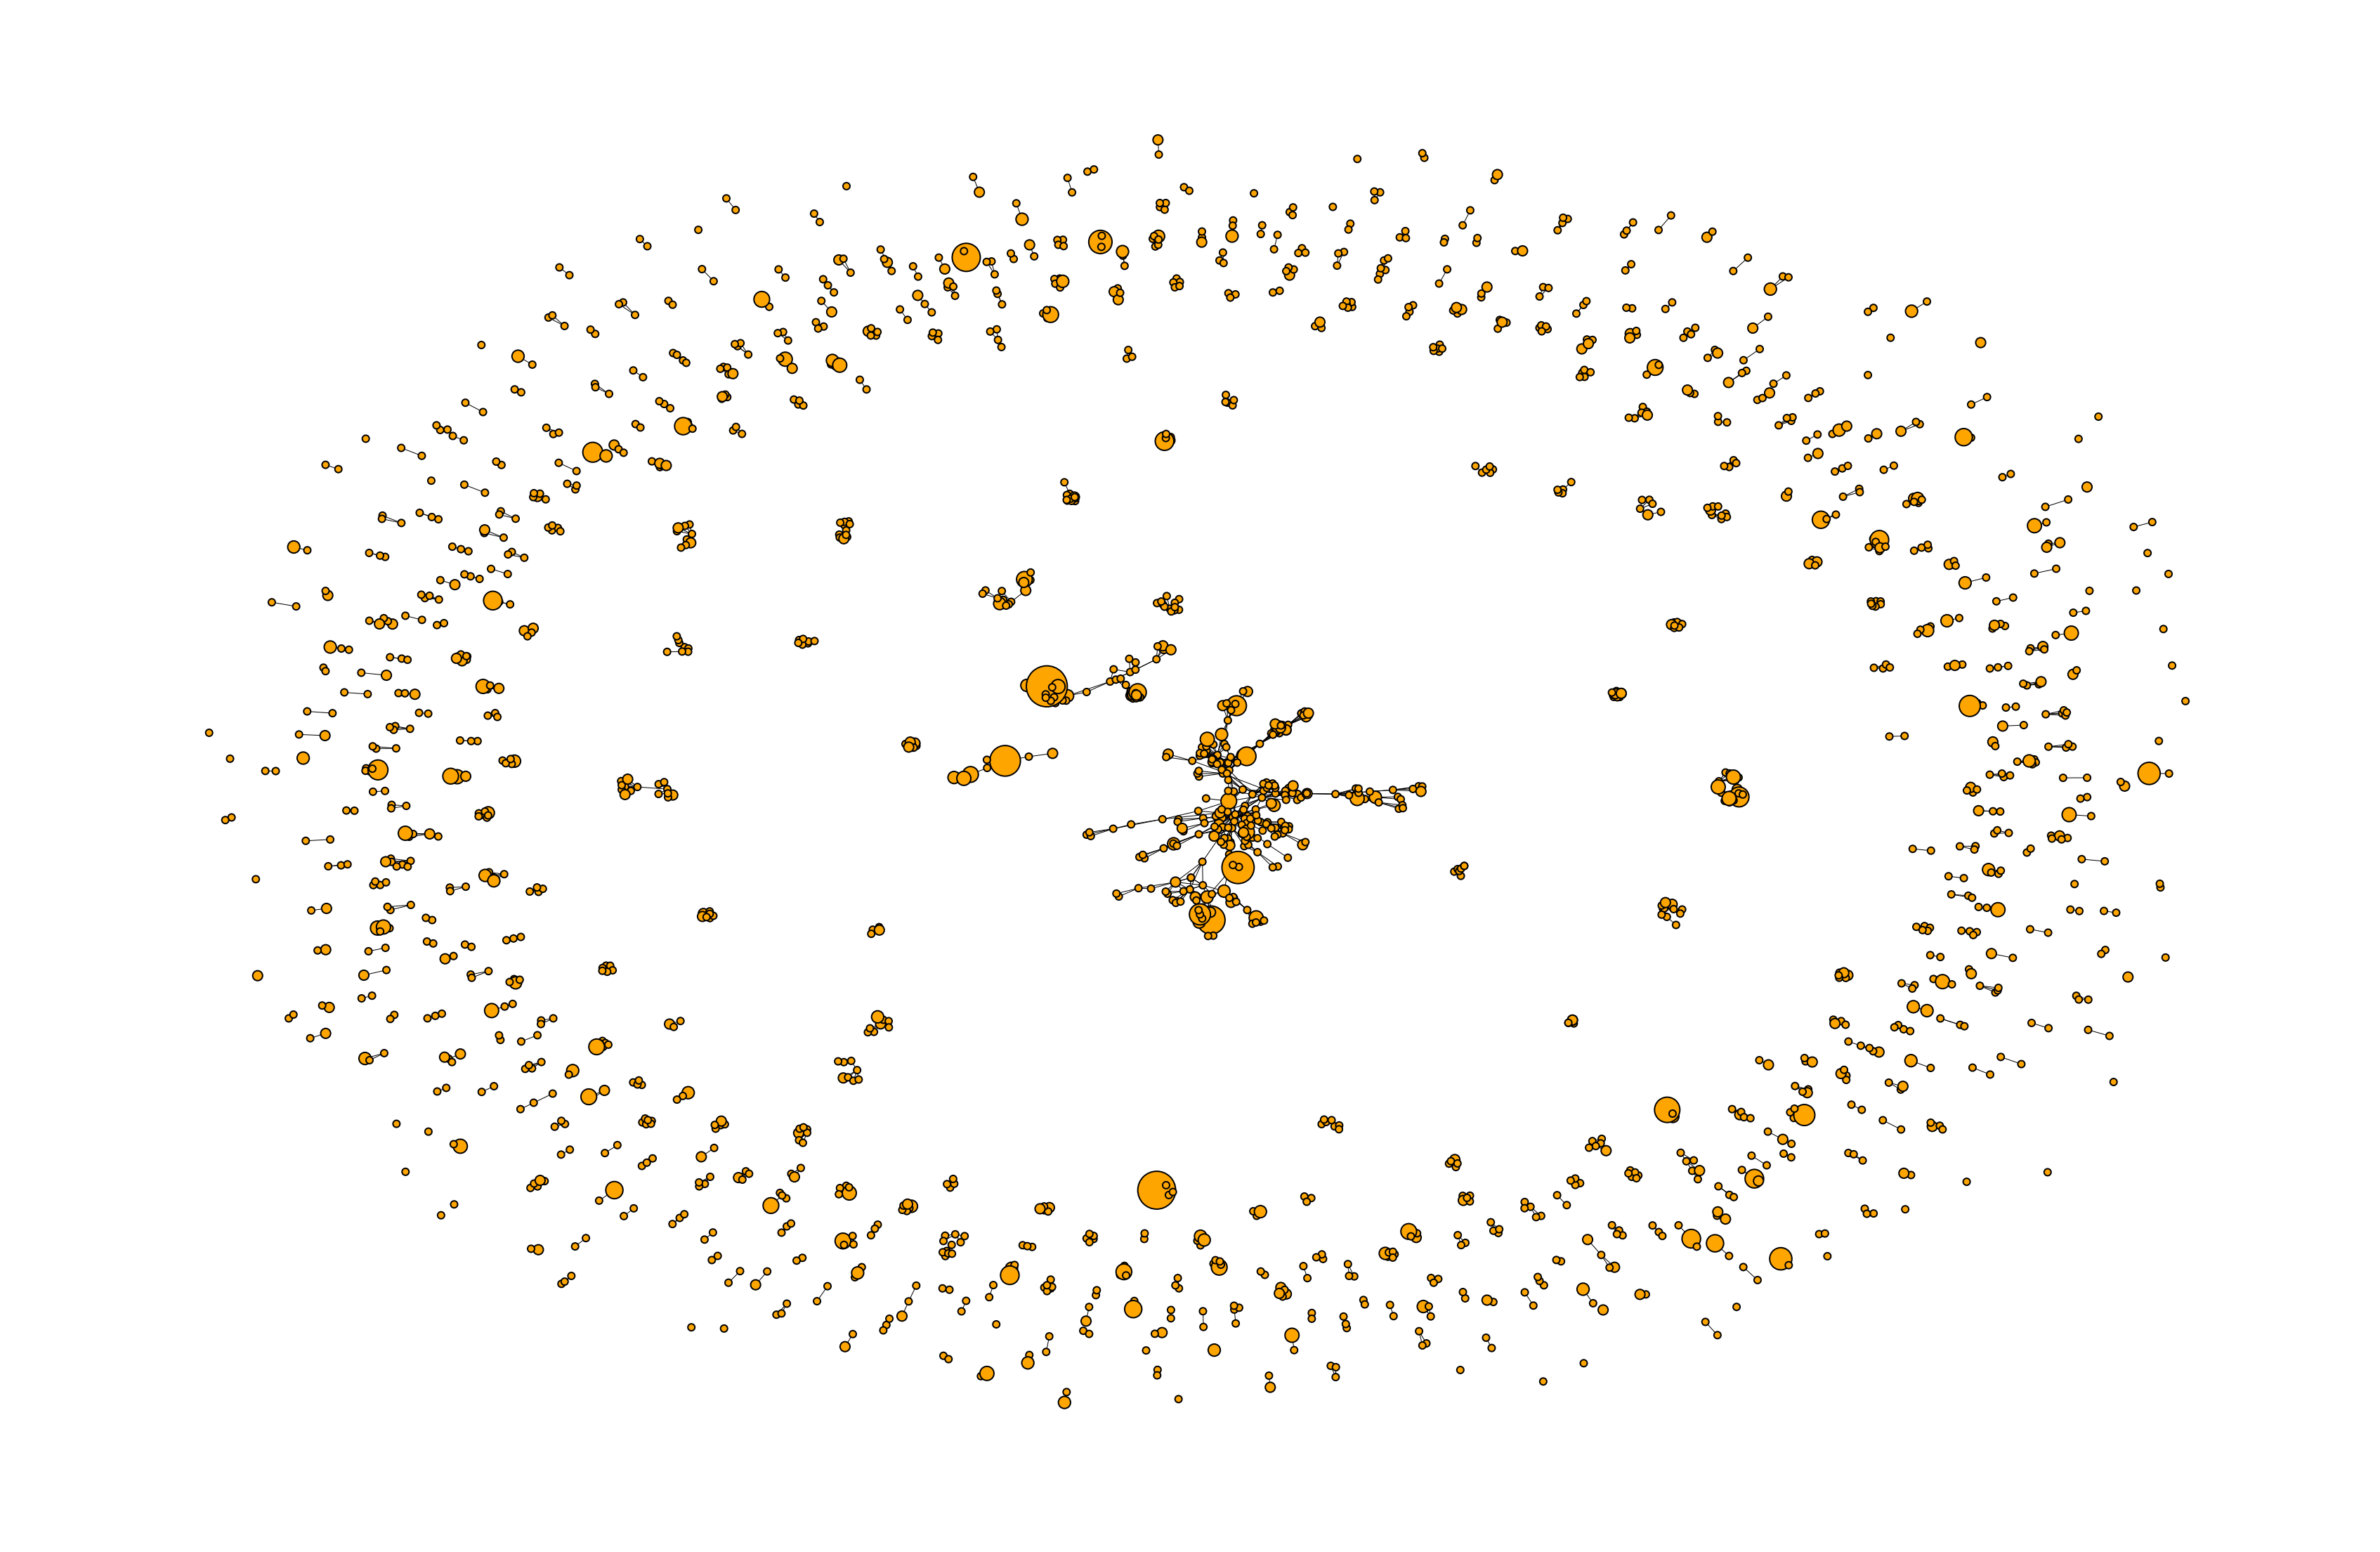

In [21]:
fig = plt.figure(figsize=(60, 40))

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='orange',
                               node_size=sizes)
nodes.set_edgecolor('black'); nx.draw_networkx_edges(G, pos)

limits=plt.axis('off') 
#plt.show()
plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/co-authors-network-weight.pdf", format='pdf', bbox_inches='tight')

Analysing co-authors network
-----------------------------

**Most published authors**

In [11]:
most_published = authors_num_papers.sort_values('unique_key').tail(10)
most_published

,unique_key
author,
martin a. nowak,11
hisao ishibuchi,13
yamir moreno,13
zhen wang,13
angel sánchez,16
long wang,16
gyorgy szabo,19
daniel ashlock,21
attila szolnoki,29


In [11]:
file = open("/home/nightwing/rsc/Literature-Article/assets/most_published.tex", 'w')
file.write('{}'.format(pd.DataFrame(most_published).to_latex()))
file.close()

**Clusters**

In [10]:
clusters = sorted(nx.clustering(G).items(), key=lambda x:x[1], reverse=True)[0:10]

In [11]:
clusters

[('myungkyoon roh', 1.0),
 ('seung-woo son', 1.0),
 ('walter avelino da luz lobato', 1.0),
 ('roger wattenhofer', 1.0),
 ('akira masumi', 1.0),
 ('shohei hidaka', 1.0),
 ('takuma torii', 1.0),
 ('guangming xie', 1.0),
 ('ahmet yasin yazicioglu', 1.0),
 ('altunbasak  yucel', 1.0)]

For unweighted graphs, the clustering of a node uu is the fraction of possible triangles through that node that exist. The maximum number is equal to 1. Thus, cliques do not appear to exist within our graph.

**Centrality**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. 
*wikipedia link: https://en.wikipedia.org/wiki/Centrality*

We could illustrate these names on the graph.

In [12]:
central_author = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]
central_author

[('matjaz perc', 0.015744032503809038),
 ('angel sánchez', 0.01371254443880142),
 ('long wang', 0.011681056373793804),
 ('yamir moreno', 0.011681056373793804),
 ('marc harper', 0.011681056373793804),
 ('alex doud', 0.011681056373793804),
 ('owen campbell', 0.010665312341289994),
 ('vincent knight', 0.010665312341289994),
 ('zhen wang', 0.01015744032503809),
 ('alex carney', 0.01015744032503809)]

In [19]:
betweeness_unweighted = sorted(nx.betweenness_centrality(G).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]
betweeness_unweighted = pd.DataFrame(betweeness_unweighted, columns=['Author name', 'Centrality'])

In [20]:
file = open("/home/nightwing/rsc/Literature-Article/assets/central_authors.tex", 'w')
file.write('{}'.format(betweeness_unweighted.to_latex()))
file.close()

In [14]:
page_rank_unweighted = sorted(nx.pagerank_numpy(G, weight=None).items(), 
                              key=lambda x:x[1], reverse=True)[0:10]
page_rank_unweighted

[('matjaz perc', 0.0028399499174380344),
 ('angel sánchez', 0.0023133806923478694),
 ('daniel ashlock', 0.002248779437762517),
 ('long wang', 0.002160147870312451),
 ('zhen wang', 0.002084562125780554),
 ('attila szolnoki', 0.0018616532631737653),
 ('krishnendu chatterjee', 0.0017569376421512886),
 ('naoki masuda', 0.0016951451248031744),
 ('yamir moreno', 0.0016723850149768303),
 ('gyorgy szabo', 0.0015581134368515283)]

**Cliques**

A clique, in the social sciences, is a group of individuals who interact with one another and share similar interests.

- Text book: http://oxfordindex.oup.com/view/10.1093/acprof:oso/9780198506263.003.0006
- wikipedia link: https://en.wikipedia.org/wiki/Clique
- networkx: https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html


The size of the largest clique in our graph.

In [12]:
size_largest_clique = nx.graph_clique_number(G)
size_largest_clique

21

In [13]:
number_of_cliques = nx.graph_number_of_cliques(G)
number_of_cliques

782

In [14]:
cliques_G = nx.make_max_clique_graph(G)

In [15]:
def max_clique_graph(cliques, min_size=3):
    """ 
    Create the maximal clique graph of a graph with node names
    """
    K = nx.Graph()
    K.name = 'cliques graph'
    for co_authors in list(cliques):
        if len(co_authors) < min_size:
            continue
        K.add_nodes_from(co_authors)
        
        edges = [(a1, a2) for a1 in co_authors for a2 in co_authors if a1 != a2]
        K.add_edges_from(edges)
        
    return K

In [16]:
cliques = nx.find_cliques(G)
Z = max_clique_graph(cliques, 5)

In [17]:
pos = nx.random_layout(Z)

In [24]:
# fig = plt.figure(figsize=(40, 20))

# pos = nx.spring_layout(Z)
# nodes = nx.draw_networkx_nodes(Z, pos, linewidths=2, node_color='orange')
# nodes.set_edgecolor('black'); nx.draw_networkx_edges(Z, pos)
# #nx.draw_networkx_labels(Z, pos)

# plt.show()

Sub-graphs
----------

In [48]:
random.seed(0)
graphs = list(nx.connected_component_subgraphs(Z))

In [49]:
len(graphs)

67

In [50]:
g_of_interest = []
random.seed(0)
for i, D in enumerate(graphs):
    betweeness_unweighted = sorted(nx.betweenness_centrality(D).items(), 
                               key=lambda x:x[1], reverse=True)[0]
    if betweeness_unweighted[1] != 0:
        g_of_interest.append(i)
        print(betweeness_unweighted, i)

('xin-jian xu', 0.025) 1
('yonghui wu', 0.08888888888888888) 6
('v. latora', 0.5) 10
('juan wang', 0.21428571428571427) 18
('weidong liu', 0.5714285714285714) 19
('matjaz perc', 0.6195402298850574) 22
('hongyan cheng', 0.5555555555555556) 23
('tao zhou', 0.5555555555555556) 31
('zhu han', 0.06746031746031744) 33


In [54]:
D = graphs[22]

In [60]:
labels = {}
for i,n in enumerate(D.nodes()):
    labels.update({n : i})

In [65]:
labels

{'alana schick': 3,
 'aleksandra murks': 0,
 'alistair blachford': 29,
 'aming li': 1,
 'attila szolnoki': 25,
 'chunyan zhang': 18,
 'elton j. s. júnior': 16,
 'guangming xie': 12,
 'jafferson k. l. da silva': 28,
 'jianlei zhang': 4,
 'lei zhou': 11,
 'lin zhang': 30,
 'long wang': 14,
 'lucas wardil': 8,
 'marco a. amaral': 2,
 'matjaz perc': 13,
 'michael doebeli': 27,
 'qi su': 24,
 'sean p. cornelius': 15,
 'tianguang chu': 19,
 'tse  chi kong': 22,
 'wen-bo du': 5,
 'wu  zhi-xi': 26,
 'xiaofeng wang': 23,
 'xiaojie chen': 20,
 'yang-yu liu': 21,
 'yongkui liu': 6,
 'zhao  qian': 9,
 'zhen wang': 10,
 'zhi-hai rong': 7,
 'zhou  tao': 17}

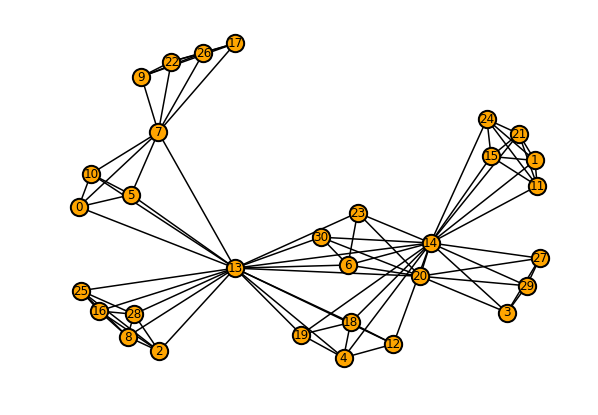

In [56]:
fig = plt.figure(figsize=(10, 7))
pos = nx.spring_layout(D)
nodes = nx.draw_networkx_nodes(D, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(D, pos, width=1.5)
nx.draw_networkx_labels(D, pos, labels)
limits=plt.axis('off')

#plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/coauthor08.pdf')

In [304]:
for i, g in enumerate(graphs):
    for k in ['r. axelrod', 'martin a. nowak', 'daniel ashlock', 'joshua b. plotkin']:
        D = g
        if k in D.nodes():
            print(i, k)

11 martin a. nowak
137 daniel ashlock


In [305]:
D = graphs[137]
D.nodes()

['mark d. smucker', 'daniel ashlock', 'leigh tesfatsion', 'e. ann stanley']

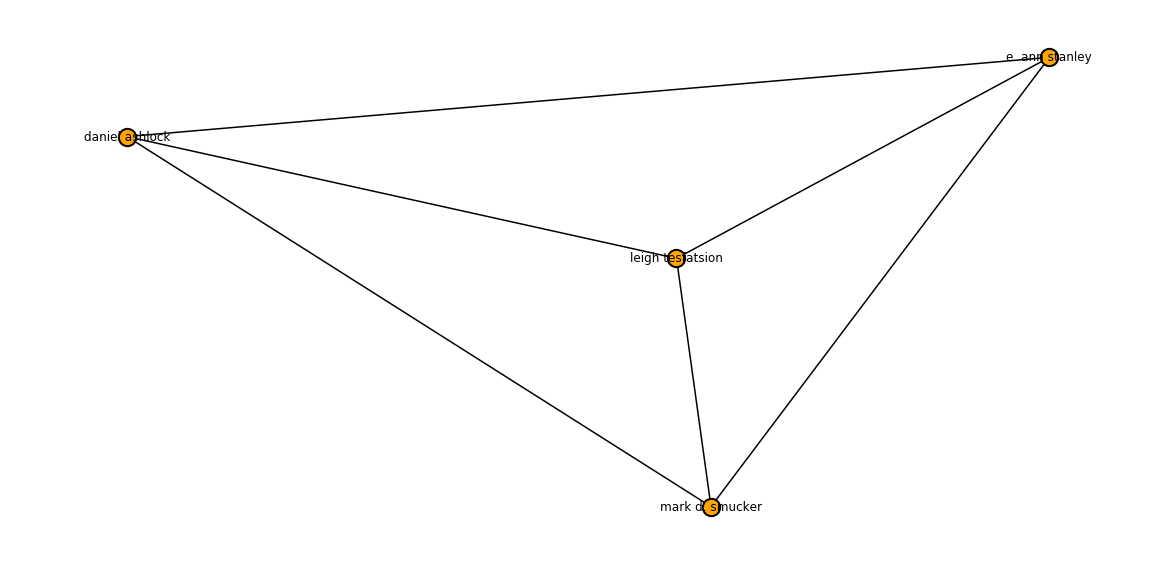

In [306]:
fig = plt.figure(figsize=(20, 10))
pos = nx.spring_layout(D)
nodes = nx.draw_networkx_nodes(D, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(D, pos, width=1.5)
nx.draw_networkx_labels(D, pos)
limits=plt.axis('off')

In [298]:
betweeness_unweighted = sorted(nx.betweenness_centrality(D).items(), 
                               key=lambda x:x[1], reverse=True)
betweeness_unweighted

[('krishnendu chatterjee', 0.7),
 ('moshe y. vardi', 0.325),
 ('martin a. nowak', 0.325),
 ('christian hilbe', 0.0),
 ('marta kwiatkowska', 0.0),
 ('benjamin m. zagorsky', 0.0),
 ('mihalis yannakakis', 0.0),
 ('jan křetínský', 0.0),
 ('johannes g. reiter', 0.0),
 ('andreas fellner', 0.0),
 ('martin chmelík', 0.0),
 ('laurent doyen', 0.0),
 ('hyeong-chai jeong', 0.0),
 ('seung ki baek', 0.0),
 ('sumit nain', 0.0),
 ('kousha etessami', 0.0),
 ('tomáš brázdil', 0.0)]

Why these people write together?
--------------------------------

In [60]:
betweeness_weighted = sorted(nx.betweenness_centrality(D, weight='weight').items(), 
                             key=lambda x:x[1], reverse=True)[0:10]

In [61]:
authors_in_clique = [name[0] for name in betweeness_unweighted] 

In [62]:
clique_df = df[df['author'].isin(authors_in_clique)]

In [63]:
prov = clique_df.groupby(['unique_key', 'provenance']).size().reset_index().groupby('provenance').size()
prov

provenance
IEEE         2
Nature       5
PLOS         6
Springer     1
arXiv       22
dtype: int64

In [64]:
publish_date = clique_df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()
publish_date

date
1987    1
2006    2
2007    3
2008    3
2009    3
2010    4
2011    1
2012    8
2013    3
2014    6
2015    1
2016    1
dtype: int64

K-means on,
-----------

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import imp
tools = imp.load_source('tools', '../tools.py')

In [66]:
clique_df = clique_df.drop_duplicates('unique_key')

In [67]:
feauture_title = list(clique_df['title'])
feauture_abstract = list(clique_df['abstract'])

In [68]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=100, 
                                   min_df=0.05, 
                                   tokenizer=tools.tokenize_text, ngram_range=(2,3))

In [99]:
tfidf_matrix = tfidf_vectorizer.fit_transform(feauture_title)

In [100]:
terms = tfidf_vectorizer.get_feature_names()

In [102]:
n_clusters =[]
silhouette_scores = []
for num_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    
    n_clusters.append(num_clusters)
    silhouette_scores.append(silhouette_avg)

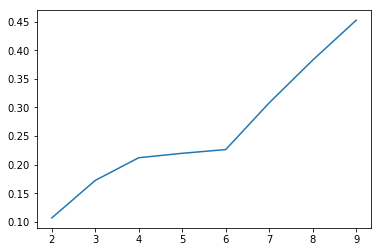

In [103]:
plt.plot(n_clusters, silhouette_scores);

In [109]:
km = KMeans(n_clusters=30, max_iter=500)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
keywords = [[terms[ind] for ind in order_centroids[i, :]] for i in range(1)]
keywords[0][:10]

['suppress network reciprocity',
 'experiment suppress network',
 'suppress network',
 'experiment suppress',
 'dilemma experiment suppress',
 'dilemma experiment',
 'prisoner dilemma experiment',
 'behavior prisoner',
 'human behavior prisoner',
 'behavior prisoner dilemma']

Graph over sections
-------------------

In [18]:
section_years =[range(1961, 1972), range(1981, 1984), 
                range(1984, 1993), range(1987, 1999),
                range(1995, 2015), range(2012, 2015), 
                range(2015, 2017)]

In [19]:
for period in section_years:
    temp = df[df['date'].isin(period)]
    
    pairs = []
    for _, d in temp.groupby('unique_key'):
        pairs += tuple(sorted(list(itertools.combinations(d['author'].unique(), 2))))
        co_authors = collections.Counter(pairs)
        
    W = nx.Graph()
    W.add_nodes_from(temp.author.unique())
    _ = [W.add_edge(*pair[0], weight=pair[1]) for pair in co_authors.items()]
    
    #print(nx.average_node_connectivity(W))
    # fig = plt.figure(figsize=(40, 20))

    # pos = nx.spring_layout(W)
    # nodes = nx.draw_networkx_nodes(W, pos, linewidths=2, node_color='orange', node_size=100)
    # nodes.set_edgecolor('black'); nx.draw_networkx_edges(W, pos)

    # limits=plt.axis('off') 
    
    # plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/network_over_period_6.pdf')

Plot av. number of co-authors vs number of paper
-----------------------------------------------------

In [20]:
co_author_counts = df.groupby(['author', 'unique_key']).size().reset_index().groupby('unique_key').count()

In [46]:
collections.Counter(elem for elem in co_author_counts['author'])

Counter({1: 272,
         2: 373,
         3: 262,
         4: 139,
         5: 55,
         6: 26,
         7: 3,
         8: 4,
         9: 2,
         10: 1,
         11: 4,
         12: 1,
         21: 1})

In [22]:
df[df['author'] == 'zhi-xi wu']['unique_key'].count()

11

In [23]:
tbl = pd.merge(authors_num_papers, pd.DataFrame.from_dict(G.degree(), orient='index'), 
               left_index=True, right_index=True)


In [27]:
tbl.head()

,number of paper,coauthors
myungkyoon roh,2,3
seung-woo son,2,3
mitsuhiro nakamura,2,1
chunyan zhang,5,6
yongkui liu,3,5


In [28]:
tbl.columns = ['number of paper', 'coauthors']

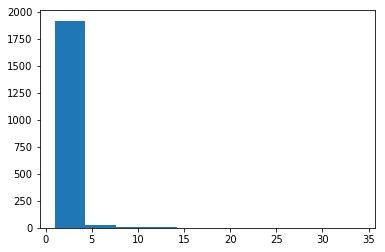

In [29]:
plt.hist(tbl['number of paper']);

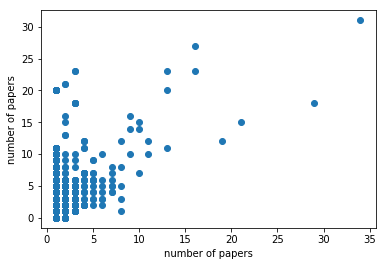

In [30]:
plt.scatter(tbl['number of paper'], tbl['coauthors'])
plt.xlabel('number of papers')
plt.ylabel('number of papers')

In [31]:
from scipy.stats import gaussian_kde
import numpy as np

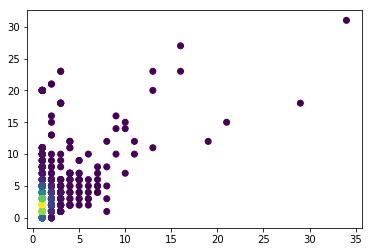

In [36]:
x = tbl['number of paper']
y = tbl['coauthors']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z);